In [12]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
results = pd.read_csv('data/model_pca200_km3_results.csv',index_col=0)

In [41]:
results.head(3)

,file_id,let_id,recipient,place,word_count,avg_sent_length,year,to_theo,avg_sentiment,num_sent,perc_neg,perc_pos,cluster,pca1,pca2
0,333_06,333,Theo van Gogh,The Hague,1885,22.043011,1883,1,0.451488,93,0.043011,0.580645,0,-19.157866,23.524390
1,534_06,534,Theo van Gogh,Nuenen,1717,21.744186,1885,1,0.329046,86,0.093023,0.511628,1,-15.323621,-0.043419
2,598_02,598,John Peter Russell,Arles,677,22.781250,1888,0,0.266045,32,0.156250,0.531250,2,8.624409,3.095655


### Naming the clusters

For a more in depth look at examples of letters from each cluster, see my blog post. To summarize, when I looked into each cluster I found that cluster 0 contained letters that were neat and well structured. Cluster 1 contains pages that are sloppier, with more crossed out writing. Finally, cluster 2 contains letters that have lots of dense, cramped writing. 

In [42]:
named_clusters = {0:'neat', 1:'sloppy', 2:'dense'}

results.cluster = results.cluster.apply(lambda x: named_clusters[x])

results.head(3)

,file_id,let_id,recipient,place,word_count,avg_sent_length,year,to_theo,avg_sentiment,num_sent,perc_neg,perc_pos,cluster,pca1,pca2
0,333_06,333,Theo van Gogh,The Hague,1885,22.043011,1883,1,0.451488,93,0.043011,0.580645,neat,-19.157866,23.524390
1,534_06,534,Theo van Gogh,Nuenen,1717,21.744186,1885,1,0.329046,86,0.093023,0.511628,sloppy,-15.323621,-0.043419
2,598_02,598,John Peter Russell,Arles,677,22.781250,1888,0,0.266045,32,0.156250,0.531250,dense,8.624409,3.095655


### Analyzing regions of high negative sentiment

Here is the plot from the NLP notebook that shows the negative sentiment of each letter plotted over time (as a rolling mean).

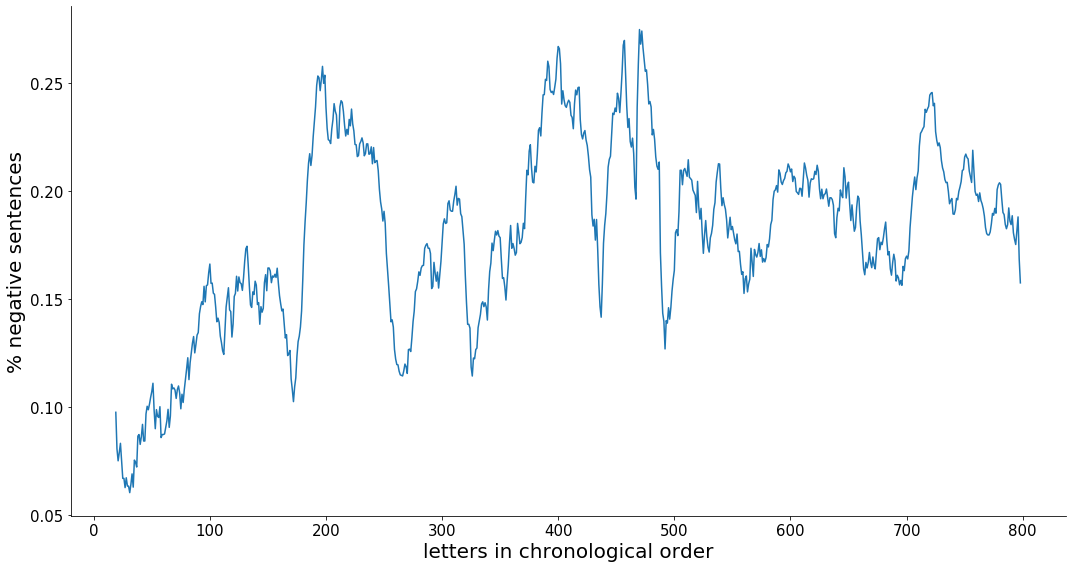

In [14]:
neg_over_time = pd.read_pickle('data/neg_sentiment_over_time.pkl')
plt.figure(figsize=(15,8))
plt.plot(neg_over_time)
plt.ylabel('% negative sentences',fontsize=20)
plt.xlabel('letters in chronological order',rotation=0,fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
sns.despine();

The first thing you’ll notice is that his letters are increasingly negative over the course of his life, with his first 100 or so being the most positive. You'll also notice three regions where the negative sentiment spikes: letters 200-250, 400-500, and 700-740. These regions are also when significantly negative events took place in Vincent's life. In the first spike, he was kicked out of his parents' house after a huge argument. In the middle region, his girlfriend committed suicide and his father died. And, finally, around letter 700 is when he had his first mental breakdown and cut off part of his ear. This shows that the events going on in his life are reflected in the sentiment of his letters.  

I then looked back to see how the letters in each of these regions were distributed across the clusters.

In the early region, his letters are neat for the most part:

In [58]:
# letters 0-100
reg1 = results[results['let_id'] <= 100].cluster.value_counts(normalize=True).sort_index().tolist()
results[results['let_id'] <= 100].cluster.value_counts(normalize=True).sort_index()

dense     0.142857
neat      0.589286
sloppy    0.267857
Name: cluster, dtype: float64

In the second region, his letters are almost all dense and cramped:

In [60]:
# letters 200-250
reg2 = results[(results['let_id'] >= 200) & (results['let_id'] <= 250)].cluster.value_counts(normalize=True).sort_index().tolist()
results[(results['let_id'] >= 200) & (results['let_id'] <= 250)].cluster.value_counts(normalize=True).sort_index()

dense     0.764706
neat      0.019608
sloppy    0.215686
Name: cluster, dtype: float64

In this region, the letters are primarily in the sloppy cluster:

In [61]:
# letters 400-500
reg3 = results[(results['let_id'] >= 400) & (results['let_id'] <= 500)].cluster.value_counts(normalize=True).sort_index().tolist()
results[(results['let_id'] >= 400) & (results['let_id'] <= 500)].cluster.value_counts(normalize=True).sort_index()

dense     0.241758
neat      0.142857
sloppy    0.615385
Name: cluster, dtype: float64

And in this final region, almost all his letters fall under the dense category:

In [62]:
# letters 700-740
reg4 = results[(results['let_id'] >= 700) & (results['let_id'] <= 740)].cluster.value_counts(normalize=True).sort_index().tolist()
results[(results['let_id'] >= 700) & (results['let_id'] <= 740)].cluster.value_counts(normalize=True).sort_index()

dense     0.161290
neat      0.161290
sloppy    0.677419
Name: cluster, dtype: float64

In other words, not only is there a mood difference in the letters, but the model is detecting a physical difference as well.

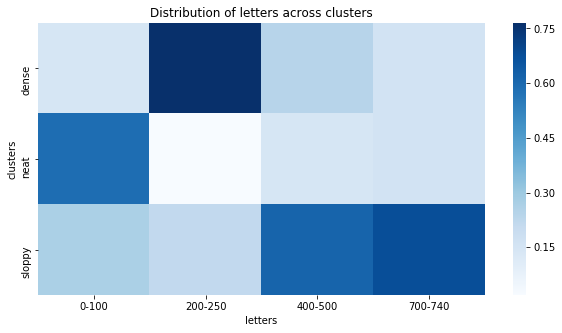

In [79]:
plt.figure(figsize=(10,5))
plt.title('Distribution of letters across clusters')
sns.heatmap(np.array([reg1,reg2,reg3,reg4]).transpose(),annot=False,cmap='Blues',xticklabels=['0-100','200-250','400-500','700-740'],yticklabels=['dense','neat','sloppy'])
plt.xlabel('letters')
plt.ylabel('clusters');
